# Census Variables Project

#### Summary: This project demonstrates how to clean, preprocess, and analyze a dataset using Python, particularly with Pandas, Matplotlib, and Seaborn. The goal was to provide insights into the data by handling missing values, converting data types, performing statistical analysis, encoding categorical variables, and visualizing key data distributions. Below is a detailed summary of the steps we followed to transform and analyze the dataset.

### 1. Introduction and Setup

In [1]:
# Let's start by importing all the necessary libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We can also add a few settings to make the output more readable
pd.set_option('display.max_columns', None)  # Show all columns in the dataframe
sns.set(style="whitegrid")  # Set the style for Seaborn plots, we will use this option in the Visualization 

### 2. Loading the Data

##### First, you'll load your data into a Pandas DataFrame. Make sure the dataset file (census_data.csv) is placed in the same directory as your Jupyter notebook or adjust the path to the file accordingly.

In [2]:
# Load the census data into a pandas DataFrame
census = pd.read_csv('census_data.csv', index_col=0)

# Display the first few rows of the dataset to get a sense of the data structure and explore more basic info of the dataset such as total rows and columns
print(census.head)
census.shape


<bound method NDFrame.head of     first_name   last_name birth_year  voted  num_children  income_year  \
0       Denise       Ratke       2005  False             0     92129.41   
1         Hali   Cummerata       1987  False             0     75649.17   
2      Salomon         Orn       1992   True             2    166313.45   
3       Sarina    Schiller       1965  False             2     71704.81   
4         Gust   Abernathy       1945  False             2    143316.08   
..         ...         ...        ...    ...           ...          ...   
95      Carisa       Hills       1958  False             3    157117.14   
96      Tameka     Collins       2001  False             1     61518.34   
97       Adams    Leuschke       1987  False             0     41784.87   
98  Earnestine     Gutmann       1985   True             4     79021.46   
99        Rosa  Runolfsson       1961   True             3     82300.02   

           higher_tax marital_status  
0            disagree         

(100, 8)

### 3. Exploring the Data


##### Next, we explore the data to understand its structure and types.

In [3]:
# Display the data types of each column
print(census.dtypes)

# Display the first few rows to get a better understanding of the columns
census.head()


first_name         object
last_name          object
birth_year         object
voted                bool
num_children        int64
income_year       float64
higher_tax         object
marital_status     object
dtype: object


,first_name,last_name,birth_year,voted,num_children,income_year,higher_tax,marital_status
0,Denise,Ratke,2005,False,0,92129.41,disagree,single
1,Hali,Cummerata,1987,False,0,75649.17,neutral,divorced
2,Salomon,Orn,1992,True,2,166313.45,agree,single
3,Sarina,Schiller,1965,False,2,71704.81,strongly agree,married
4,Gust,Abernathy,1945,False,2,143316.08,agree,married


### 4. Exploring Unique Values in Columns

##### Check for unique values in a specific column to understand the range of possible values, such as for birth_year and higher_tax columns. For this we use unique()

In [4]:
# Check the unique values in the 'birth_year' column
print("\nUnique values for the birth year are:")
print(census['birth_year'].unique())

print("\nUnique values for the higher tax are:")
print(census['higher_tax'].unique())


Unique values for the birth year are:
['2005' '1987' '1992' '1965' '1945' '1951' '1963' '1949' '1950' '1971'
 '2007' '1944' '1995' '1973' '1946' '1954' '1994' '1989' '1947' '1993'
 '1976' '1984' 'missing' '1966' '1941' '2000' '1953' '1956' '1960' '2001'
 '1980' '1955' '1985' '1996' '1968' '1979' '2006' '1962' '1981' '1959'
 '1977' '1978' '1983' '1957' '1961' '1982' '2002' '1998' '1999' '1952'
 '1940' '1986' '1958']

Unique values for the higher tax are:
['disagree' 'neutral' 'agree' 'strongly agree' 'strongly disagree']


##### But if we only want to know how many unique values we have in a column, without having to call all the values. For this we can use nuniuque() 

In [5]:
print("\n The total number of unique values for the birth years is")
print(census['birth_year'].nunique())

print("\n The total number of unique values for higher income column is:")
print(census['higher_tax'].nunique())



 The total number of unique values for the birth years is
53

 The total number of unique values for higher income column is:
5


### 5. Handling Missing Values

In [6]:
# Replace 'missing' values in 'birth_year' with 1967
census['birth_year'] = census['birth_year'].replace(['missing'], 1967)

# Verify the unique values again after replacement and see how "missing" is gone
print(census['birth_year'].unique())


['2005' '1987' '1992' '1965' '1945' '1951' '1963' '1949' '1950' '1971'
 '2007' '1944' '1995' '1973' '1946' '1954' '1994' '1989' '1947' '1993'
 '1976' '1984' 1967 '1966' '1941' '2000' '1953' '1956' '1960' '2001'
 '1980' '1955' '1985' '1996' '1968' '1979' '2006' '1962' '1981' '1959'
 '1977' '1978' '1983' '1957' '1961' '1982' '2002' '1998' '1999' '1952'
 '1940' '1986' '1958']


### 6. Changing Data Types

##### After replacing missing values, you convert the birth_year column to an integer data type. This ensures that any future calculations on this column are correct and we have no problems.

There are are may ways to do this; here we will use the astype() method

In [7]:
# Convert the 'birth_year' column to an integer type
census['birth_year'] = census['birth_year'].astype('int')

# Display the data types of the columns again to verify the change
print(census.dtypes)


first_name         object
last_name          object
birth_year          int32
voted                bool
num_children        int64
income_year       float64
higher_tax         object
marital_status     object
dtype: object


### 7. Basic Statistical Analysis

##### We can use this step to calculate some basic statistics, such as the mean or median of the birth_year column.

In [8]:
# Calculate and print the mean of the 'birth_year' column
mean_year = census['birth_year'].mean()
print(f" The mean of all the years in our dataset is: {mean_year}")

 The mean of all the years in our dataset is: 1973.4


### 8. Handling Categorical Data

##### We are now converting a column (higher_tax) into a categorical type with ordered levels. This is important for deeper analysis, especially when performing machine learning tasks later on as we will see in future projects.

In [9]:
# Convert 'higher_tax' to a categorical type with ordered levels
census['higher_tax'] = pd.Categorical(census['higher_tax'], 
                                      categories=['strongly disagree', 'disagree', 'neutral', 'agree', 'strongly agree'], 
                                      ordered=True)

# Display the unique values of the 'higher_tax' column
print(census['higher_tax'].unique())


['disagree', 'neutral', 'agree', 'strongly agree', 'strongly disagree']
Categories (5, object): ['strongly disagree' < 'disagree' < 'neutral' < 'agree' < 'strongly agree']


###### We reprint once again the dtypes() to see the changes

In [10]:
print(census.dtypes)

first_name          object
last_name           object
birth_year           int32
voted                 bool
num_children         int64
income_year        float64
higher_tax        category
marital_status      object
dtype: object


### 9. Label Encoding of Categorical Data

##### Let´s convert categorical values into numeric codes, which is useful for machine learning algorithms.

In [11]:
# Use the 'cat.codes' method to convert the 'higher_tax' column to numeric codes
census['higher_tax'] = census['higher_tax'].cat.codes

# Print the median value of the 'higher_tax' column after encoding
print(census['higher_tax'].median())


2.0


### 10. One-Hot Encoding

##### The marital_status column can be converted into multiple binary columns using one-hot encoding, which is common for categorical variables when preparing data for machine learning.

In [12]:
# Perform One-Hot Encoding for the 'marital_status' column
census = pd.get_dummies(census, columns=['marital_status'], drop_first=True)

# Display the updated DataFrame
display(census.head())


,first_name,last_name,birth_year,voted,num_children,income_year,higher_tax,marital_status_married,marital_status_single,marital_status_widowed
0,Denise,Ratke,2005,False,0,92129.41,1,False,True,False
1,Hali,Cummerata,1987,False,0,75649.17,2,False,False,False
2,Salomon,Orn,1992,True,2,166313.45,3,False,True,False
3,Sarina,Schiller,1965,False,2,71704.81,4,True,False,False
4,Gust,Abernathy,1945,False,2,143316.08,3,True,False,False


### 11. Visualization

##### Althou we will explore charst anda data visualization in future projects, adding some basic visualizations will help us to make this data analysis more interactive and understandable. For example, you can plot the distribution of the birth_year.

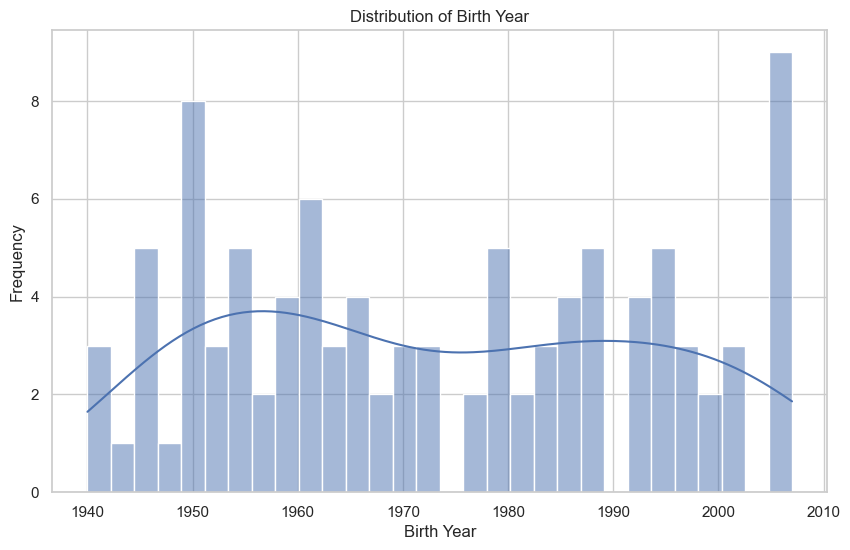

In [13]:
# Plot the distribution of 'birth_year'
plt.figure(figsize=(10, 6))
sns.histplot(census['birth_year'], bins=30, kde=True)
plt.title('Distribution of Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

### 12. Conclusion

##### Finally, we can summarize our findings and the steps taken during this analysis we just did. Here we might mention insights such as trends, potential data issues, and how you handled them. For now, we can sum up what we did and discover in this project

- We successfully loaded and explored the dataset, identifying key columns such as `birth_year` and `higher_tax`.
- We handled missing values by replacing 'missing' entries with the year 1967.
- We converted categorical variables into numerical ones using label encoding and one-hot encoding, which are useful for future analysis or machine learning tasks.
- The dataset was prepared and cleaned for further analysis.

This process can be further extended with more advanced techniques such as feature scaling, outlier detection, and more complex visualizations.
